<a href="https://colab.research.google.com/github/lindsayfm424/Power-outages-and-electrification/blob/main/Group_8_Replication_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automated Social Science: Language Models as Scientist and Subjects

## LLM conducted social experiment simulation

### Section 3 Mug Negotiation

In [ ]:
import json
import random
import pandas as pd

from openai import OpenAI

client = OpenAI(
    base_url='https://xiaoai.plus/v1',
    api_key='sk-t3vekqtQGBirkfbilQsRpb01pHLYM78GpO6BQnVQx682fM36' # Replace with your own openai api key
)
completion = client.chat.completions.create(
  model="gpt-4o",
  messages=[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Hello!"}
  ]
)
print(completion.choices[0].message)

ChatCompletionMessage(content='Hello! How can I help you today?', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None)


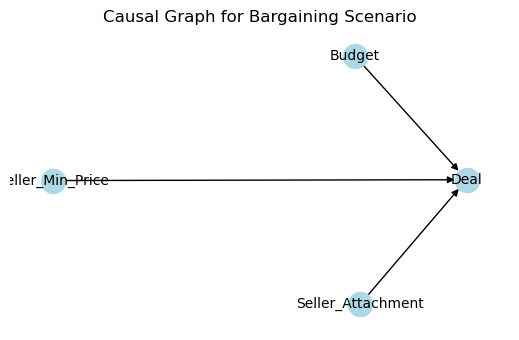

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def create_scm():
    G = nx.DiGraph()
    G.add_edges_from([
        ("Budget", "Deal"),  # Higher budget increases chance of a deal
        ("Seller_Min_Price", "Deal"),  # Lower minimum price increases chance
        ("Seller_Attachment", "Deal")  # High attachment lowers chance of selling
    ])

    # Plot the SCM
    plt.figure(figsize=(5, 3))
    nx.draw(G, with_labels=True, node_color="lightblue", edge_color="black", font_size=10)
    plt.title("Causal Graph for Bargaining Scenario")
    plt.show()

    return G

scm = create_scm()

In [ ]:
def query_gpt(prompt):
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": prompt}]
    )
    return response.choices[0].message.content

# Example: Ask GPT to generate hypotheses
prompt = "In a negotiation where a buyer wants to purchase a mug, what factors affect whether a deal occurs? Give structured hypotheses."
print(query_gpt(prompt))

In the context of a negotiation where a buyer wants to purchase a mug, several factors can influence whether a deal occurs. These factors can be categorized and structured as hypotheses as follows:

1. **Price-Related Factors:**
   - **H1: Affordability Hypothesis**
     - If the price of the mug aligns with the buyer’s budget, then a deal is more likely to occur.
   - **H2: Perceived Value Hypothesis**
     - If the buyer perceives the mug as being worth more than or equal to the asking price, then a deal is more likely to occur.
   - **H3: Price Flexibility Hypothesis**
     - If the seller is willing to negotiate the price, then a deal is more likely to occur.

2. **Product-Related Factors:**
   - **H4: Quality Perception Hypothesis**
     - If the buyer perceives the quality of the mug as high, then a deal is more likely to occur.
   - **H5: Design and Aesthetic Appeal Hypothesis**
     - If the design and aesthetics of the mug match the buyer's preference, then a deal is more like

In [ ]:
# Choices for parameters in simulations
buyer_budgets = ["3","5","7","9","11","13","15","17","19"]
seller_min_prices = ["3","5","7","9","11","13","15","17","19"]
seller_attachments = ["No Attachment", "Slight", "Moderate", "High", "Extreme"]

# Creat list to store the results
experiment_data = []
dialogues = []

def simulate_negotiation(buyer_budget, seller_min_price, seller_attachment):


    prompt = f"""
    You are a sociology professor and are doing a social experiment. You will be acting as buyer and seller at the sametime.
    The buyer you are acting want to buy a mug from a seller，your budget is {buyer_budget} USD.
    And the Seller's minimum acceptance price in his heart is {seller_min_price} USD. You still need to consider his emotional attachments
    for the mug is  '{seller_attachment}'.

    Please start the negotiation between these two buyer and seller，if eventually they make the dear, reply 'Deal: Yes'，if not, reply'Deal: No'。
    """

    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": prompt}]
    )

    dialogue_text = response.choices[0].message.content  # acquire the dialogue
    deal_status = 1 if "Deal: Yes" in dialogue_text else 0  # assess whether the deal happened

    return dialogue_text, deal_status

# Run 9 × 9 × 5 = 405 times of experiment
for budget in buyer_budgets:
    for min_price in seller_min_prices:
        for attachment in seller_attachments:
            dialogue, deal = simulate_negotiation(budget, min_price, attachment)

            # Record the dialogue
            dialogues.append({
                "buyer_budget": budget,
                "seller_min_price": min_price,
                "seller_attachment": attachment,
                "dialogue": dialogue
            })

            # Record the experiment results
            experiment_data.append({
                "buyer_budget": budget,
                "seller_min_price": min_price,
                "seller_attachment": attachment,
                "deal": deal
            })

# Save negatiation dialogues as JSON
with open("negotiation_dialogues.json", "w", encoding="utf-8") as json_file:
    json.dump(dialogues, json_file, indent=4, ensure_ascii=False)

# Save deal results as csv for linear regression estimation
df = pd.DataFrame(experiment_data)
df.to_csv("negotiation_results.csv", index=False)

print("✅ Done！The negotiations have been saved as JSON，and the data have been saved as CSV file")

✅ Done！The negotiations have been saved as JSON，and the data have been saved as CSV file


In [ ]:
# Read dialogue JSON file
import json

with open("negotiation_dialogues.json", "r", encoding="utf-8") as json_file:
    dialogues = json.load(json_file)

for i, dialogue in enumerate(dialogues[:5]):
    print(f"Dialogue {i + 1}:")
    print(json.dumps(dialogue, indent=4, ensure_ascii=False))
    print("-" * 50)

Dialogue 1:
{
    "buyer_budget": "3",
    "seller_min_price": "3",
    "seller_attachment": "No Attachment",
    "dialogue": "**Buyer (B):** Hi! I'm interested in purchasing this mug. It's quite nice! How much are you asking for it?\n\n**Seller (S):** Hello! Thanks for your interest. I’m selling it for $5.\n\n**B:** I see. That’s a bit above my budget. I can offer you $2.50.\n\n**S:** Hmm, $2.50 is a bit low for me. How about $4?\n\n**B:** I understand, but I really need to stick to my budget. I can go up to $3. Would that work for you?\n\n**S:** Well, I wasn't initially planning to sell it for that low, but I don't have any emotional attachment to it. I think I can accept $3.\n\n**B:** Great! That sounds perfect. Thank you!\n\n**S:** Wonderful. It's a deal then.\n\n**Deal: Yes**"
}
--------------------------------------------------
Dialogue 2:
{
    "buyer_budget": "3",
    "seller_min_price": "3",
    "seller_attachment": "Slight",
    "dialogue": "Buyer: Hi, I'm interested in purch

In [ ]:
import statsmodels.api as sm
import pandas as pd
path = "C:\\Users\\11541\\negotiation_results.csv"
df=pd.read_csv(path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   buyer_budget       405 non-null    int64 
 1   seller_min_price   405 non-null    int64 
 2   seller_attachment  405 non-null    object
 3   deal               405 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.8+ KB


In [ ]:
df.head()

,buyer_budget,seller_min_price,seller_attachment,deal
0,3,3,No Attachment,1
1,3,3,Slight,1
2,3,3,Moderate,1
3,3,3,High,1
4,3,3,Extreme,1


In [ ]:
def causal_analysis(data):
    data["seller_attachment"] = data["seller_attachment"].map({"No Attachment": 1, "Slight": 2, "Moderate": 3, "High": 4, "Extreme": 5})

    X = data[["buyer_budget", "seller_min_price", "seller_attachment"]]
    y = data["deal"]

    X = sm.add_constant(X)  # Add constant for intercept
    model = sm.OLS(y, X).fit()

    print(model.summary())

causal_analysis(df)

                            OLS Regression Results                            
Dep. Variable:                   deal   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     202.4
Date:                Wed, 05 Feb 2025   Prob (F-statistic):           6.59e-80
Time:                        19:54:01   Log-Likelihood:                -102.92
No. Observations:                 405   AIC:                             213.8
Df Residuals:                     401   BIC:                             229.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5795      0.05

### Section 3 Auction

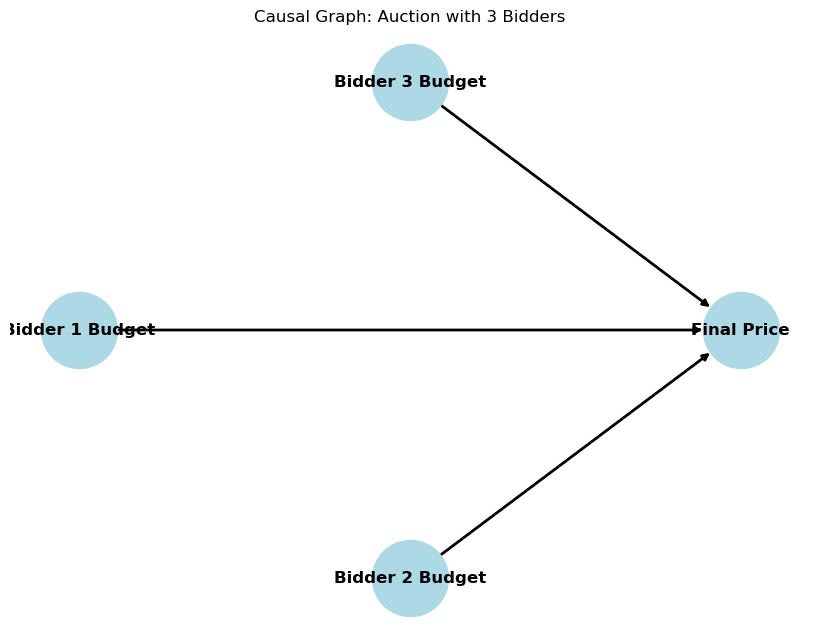

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def create_causal_graph():
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes for bidders' budgets and the final price
    G.add_node("Bidder 1 Budget")
    G.add_node("Bidder 2 Budget")
    G.add_node("Bidder 3 Budget")
    G.add_node("Final Price")

    # Add directed edges representing causal relationships
    G.add_edge("Bidder 1 Budget", "Final Price", weight=0.35)
    G.add_edge("Bidder 2 Budget", "Final Price", weight=0.29)
    G.add_edge("Bidder 3 Budget", "Final Price", weight=0.31)

    # Set node positions for better visualization
    pos = {
        "Bidder 1 Budget": (0, 1),
        "Bidder 2 Budget": (1, 0),
        "Bidder 3 Budget": (1, 2),
        "Final Price": (2, 1)
    }

    # Draw the graph
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=12, font_weight="bold", edge_color="black", width=2, arrows=True)


    # Show the plot
    plt.title("Causal Graph: Auction with 3 Bidders")
    plt.show()

# Call the function to create and display the causal graph
create_causal_graph()

In [ ]:
# Define bidder's budget levels
budget_levels = [50, 100, 150, 200, 250, 300, 350]  # 7 budget levels

# Store the experiment data
experiment_data = []
dialogues = []

def run_auction(bidder1_budget, bidder2_budget, bidder3_budget):
    """Run the auction simulation with GPT-4o"""

    prompt = f"""
    You are an auctioneer hosting an auction for a piece of art starting at $50.
    There are three bidders, and their budgets are as follows:
    - Bidder 1 Budget: ${bidder1_budget}
    - Bidder 2 Budget: ${bidder2_budget}
    - Bidder 3 Budget: ${bidder3_budget}

    The auction proceeds with bidders taking turns to raise the bid, each bid must exceed the current highest bid,but should not exceed each bidders' budget
    The auction continues until no bidder is willing to bid higher.
    You need to run the auction and announce the final price at the end.

    Please conduct the auction and explicitly state the final price, for example, "Final Price: $XXX".
    """

    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": prompt}]
    )

    dialogue_text = response.choices[0].message.content
    final_price = extract_final_price(dialogue_text)

    return final_price, dialogue_text

def extract_final_price(text):
    """Extract the final price from GPT-4o generated text"""
    import re
    match = re.search(r"Final Price: \$(\d+)", text)
    if match:
        return int(match.group(1))
    return None  # Return None if final price is not found

# Run 7×7×7 = 343 auction simulations
for bidder1_budget in budget_levels:
    for bidder2_budget in budget_levels:
        for bidder3_budget in budget_levels:
            final_price, dialogue = run_auction(bidder1_budget, bidder2_budget, bidder3_budget)

            # Store the dialogue
            dialogues.append({
                "bidder1_budget": bidder1_budget,
                "bidder2_budget": bidder2_budget,
                "bidder3_budget": bidder3_budget,
                "final_price": final_price,
                "dialogue": dialogue
            })

            # Store experiment data for regression analysis
            experiment_data.append({
                "bidder1_budget": bidder1_budget,
                "bidder2_budget": bidder2_budget,
                "bidder3_budget": bidder3_budget,
                "final_price": final_price
            })

# Save auction dialogues to JSON
with open("auction_dialogues.json", "w", encoding="utf-8") as json_file:
    json.dump(dialogues, json_file, indent=4, ensure_ascii=False)

# Save experiment data to CSV for regression analysis
df = pd.DataFrame(experiment_data)
df.to_csv("auction_results.csv", index=False)

print("✅ Experiment completed! Dialogues saved as JSON, and experiment data saved as CSV.")

✅ Experiment completed! Dialogues saved as JSON, and experiment data saved as CSV.


In [ ]:
import json

# Read auction dialogues from JSON file
with open("auction_dialogues.json", "r", encoding="utf-8") as json_file:
    dialogues = json.load(json_file)

for i, dialogue in enumerate(dialogues[:5]):
    print(f"Dialogue {i + 1}:")
    print(json.dumps(dialogue, indent=4, ensure_ascii=False))
    print("-" * 50)

Dialogue 1:
{
    "bidder1_budget": 50,
    "bidder2_budget": 50,
    "bidder3_budget": 50,
    "final_price": 50,
    "dialogue": "Alright, let's start the auction for the piece of art at $50.\n\n**Opening bid: $50**\n\n**Bidders, please take turns to raise the bid:**\n\n- Bidder 1, would you like to raise the bid?\n- Bidder 1: No, I can't. I have reached my budget.\n\n- Bidder 2, would you like to raise the bid?\n- Bidder 2: No, I can't. I have reached my budget.\n\n- Bidder 3, would you like to raise the bid?\n- Bidder 3: No, I can't. I have reached my budget.\n\nSince no bidders are willing to raise the bid higher, the auction concludes.\n\n**Final Price: $50**"
}
--------------------------------------------------
Dialogue 2:
{
    "bidder1_budget": 50,
    "bidder2_budget": 50,
    "bidder3_budget": 100,
    "final_price": 55,
    "dialogue": "Welcome, everyone, to this exciting art auction! We'll begin with an opening bid of $50 for this magnificent piece. Remember, each new bid 

In [ ]:
# Read experiment data from CSV
df2 = pd.read_csv("C:\\Users\\11541\\auction_results.csv")
df2=df2.dropna()
# Define the regression model
X = df2[["bidder1_budget", "bidder2_budget", "bidder3_budget"]]
y = df2["final_price"]

X = sm.add_constant(X)  # Add intercept term
model = sm.OLS(y, X).fit()

# Output the regression results (path coefficients)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            final_price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     388.8
Date:                Sat, 08 Feb 2025   Prob (F-statistic):          1.25e-107
Time:                        02:47:31   Log-Likelihood:                -1675.2
No. Observations:                 332   AIC:                             3358.
Df Residuals:                     328   BIC:                             3374.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -33.0541      7.455     -4.

In [ ]:
df2.head()


,bidder1_budget,bidder2_budget,bidder3_budget,final_price
0,50,50,50,50.0
1,50,50,100,55.0
2,50,50,150,60.0
3,50,50,200,60.0
4,50,50,250,51.0


### Section 3 Innovation: auction with bidders' affection level

In [ ]:
# Define bidder's budget levels and affection levels
budget_levels = [1000000, 2000000, 3000000]  # 3 budget levels
affection_levels = ["Very Low", "Low", "Medium", "High", "Very High"]  # 5 affection levels

# Define the starting price and bid increment
starting_price = 100000
bid_increment = 100000

# Store the experiment data
experiment_data = []
dialogues = []

def run_auction(bidder1_budget, bidder2_budget, bidder3_budget, bidder1_affection, bidder2_affection, bidder3_affection):
    """Run the auction simulation with GPT-4o"""

    prompt = f"""
    You are an auctioneer hosting an auction for a piece of art starting at ${starting_price}.
    There are three bidders, and their budgets and affection levels for the art are as follows:
    - Bidder 1 Budget: ${bidder1_budget}, Affection: {bidder1_affection}
    - Bidder 2 Budget: ${bidder2_budget}, Affection: {bidder2_affection}
    - Bidder 3 Budget: ${bidder3_budget}, Affection: {bidder3_affection}

    The auction proceeds with bidders taking turns to raise the bid, each bid must exceed the current highest bid by ${bid_increment}.
    The auction continues until no bidder is willing to bid higher.
    You need to run the auction and announce the final price at the end.

    Please conduct the auction and explicitly state the final price, for example, "Final Price: $XXX".
    """

    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": prompt}]
    )

    dialogue_text = response.choices[0].message.content
    final_price = extract_final_price(dialogue_text)

    return final_price, dialogue_text

def extract_final_price(text):
    """Extract the final price from GPT-4o generated text"""
    import re
    # Update regex to allow for commas in numbers (e.g., 1,000,000)
    match = re.search(r"Final Price: \$(\d{1,3}(?:,\d{3})*)", text)
    if match:
        # Remove the commas and convert to integer
        final_price = match.group(1).replace(",", "")
        return int(final_price)
    return None  # Return None if final price is not found

# Run 3×3×3×5×5×5 = 3 * 3 * 3 * 5 * 5 * 5 = 3375 auction simulations
for bidder1_budget in budget_levels:
    for bidder2_budget in budget_levels:
        for bidder3_budget in budget_levels:
            for bidder1_affection in affection_levels:
                for bidder2_affection in affection_levels:
                    for bidder3_affection in affection_levels:
                        final_price, dialogue = run_auction(bidder1_budget, bidder2_budget, bidder3_budget,
                                                             bidder1_affection, bidder2_affection, bidder3_affection)

                        # Store the dialogue
                        dialogues.append({
                            "bidder1_budget": bidder1_budget,
                            "bidder2_budget": bidder2_budget,
                            "bidder3_budget": bidder3_budget,
                            "bidder1_affection": bidder1_affection,
                            "bidder2_affection": bidder2_affection,
                            "bidder3_affection": bidder3_affection,
                            "final_price": final_price,
                            "dialogue": dialogue
                        })

                        # Store experiment data for regression analysis
                        experiment_data.append({
                            "bidder1_budget": bidder1_budget,
                            "bidder2_budget": bidder2_budget,
                            "bidder3_budget": bidder3_budget,
                            "bidder1_affection": bidder1_affection,
                            "bidder2_affection": bidder2_affection,
                            "bidder3_affection": bidder3_affection,
                            "final_price": final_price
                        })

# Save auction dialogues to JSON
with open("auction_dialogues_with_updated_conditions.json", "w", encoding="utf-8") as json_file:
    json.dump(dialogues, json_file, indent=4, ensure_ascii=False)

# Save experiment data to CSV for regression analysis
df = pd.DataFrame(experiment_data)
df.to_csv("auction_results_with_updated_conditions.csv", index=False)

print("✅ Experiment completed! Dialogues saved as JSON, and experiment data saved as CSV.")

✅ Experiment completed! Dialogues saved as JSON, and experiment data saved as CSV.


In [ ]:
import json
import pandas as pd

# Load the JSON file containing the experiment data
with open("auction_dialogues_with_updated_conditions.json", "r", encoding="utf-8") as json_file:
    dialogues = json.load(json_file)  # Load the data into a list

# Extract relevant data into a structured format for regression analysis
experiment_data = []

for dialogue in dialogues:
    experiment_data.append({
        "bidder1_budget": dialogue["bidder1_budget"],
        "bidder2_budget": dialogue["bidder2_budget"],
        "bidder3_budget": dialogue["bidder3_budget"],
        "bidder1_affection": dialogue["bidder1_affection"],
        "bidder2_affection": dialogue["bidder2_affection"],
        "bidder3_affection": dialogue["bidder3_affection"],
        "final_price": dialogue["final_price"]
    })

# Convert the extracted data into a DataFrame for easier manipulation and analysis
df = pd.DataFrame(experiment_data)

# Display the first few rows of the dataframe to confirm
print(df.head())

# Optionally, save the extracted data as a CSV file if needed for further analysis
df.to_csv("experiment_data_for_analysis.csv", index=False)

   bidder1_budget  bidder2_budget  bidder3_budget bidder1_affection  \
0         1000000         1000000         1000000          Very Low   
1         1000000         1000000         1000000          Very Low   
2         1000000         1000000         1000000          Very Low   
3         1000000         1000000         1000000          Very Low   
4         1000000         1000000         1000000          Very Low   

  bidder2_affection bidder3_affection  final_price  
0          Very Low          Very Low          1.0  
1          Very Low               Low        200.0  
2          Very Low            Medium        600.0  
3          Very Low              High        200.0  
4          Very Low         Very High        200.0  


In [ ]:
import json

with open("auction_dialogues_with_updated_conditions.json", "r", encoding="utf-8") as json_file:
    dialogues = json.load(json_file)

for i, dialogue in enumerate(dialogues[:5]):
    print(f"dialogue {i + 1}:")
    print(json.dumps(dialogue, indent=4, ensure_ascii=False))
    print("-" * 50)

dialogue 1:
{
    "bidder1_budget": 1000000,
    "bidder2_budget": 1000000,
    "bidder3_budget": 1000000,
    "bidder1_affection": "Very Low",
    "bidder2_affection": "Very Low",
    "bidder3_affection": "Very Low",
    "final_price": 1,
    "dialogue": "Certainly, let’s conduct the auction.\n\nStarting bid: $100,000\n\n**Round 1:**\n- Bidder 1: $200,000\n- Bidder 2: $300,000\n- Bidder 3: $400,000\n\n**Round 2:**\n- Bidder 1: $500,000\n- Bidder 2: $600,000\n- Bidder 3: $700,000\n\n**Round 3:**\n- Bidder 1: $800,000\n- Bidder 2: $900,000\n- Bidder 3: $1,000,000\n\n**Round 4:**\n- Bidder 1: Not willing to bid higher (stays at $1,000,000 max)\n- Bidder 2: Not willing to bid higher (stays at $1,000,000 max)\n- Bidder 3: Not willing to bid higher (stays at $1,000,000 max)\n\nSince all bidders have reached their budget limit and are not willing to bid higher, the final price remains at $1,000,000.\n\nFinal Price: $1,000,000"
}
--------------------------------------------------
dialogue 2:


In [ ]:
import re

def extract_final_price_from_dialogue(dialogue_text):
    """Extract the final price from the 'dialogue' field in the auction simulation."""
    # Regular expression to find "Final Price" followed by the price with possible commas
    match = re.search(r"Final Price: \$(\d{1,3}(?:,\d{3})*)", dialogue_text)
    if match:
        # Remove commas and convert to integer
        final_price = match.group(1).replace(",", "")  # Remove commas
        return int(final_price)
    return None  # Return None if final price is not found

In [ ]:
import json
import pandas as pd

# Load the JSON file containing the experiment data
with open("auction_dialogues_with_updated_conditions.json", "r", encoding="utf-8") as json_file:
    dialogues = json.load(json_file)

# Extract relevant data and final price from the dialogue field
experiment_data = []

for dialogue in dialogues:
    # Extract final price using the function we defined
    final_price = extract_final_price_from_dialogue(dialogue["dialogue"])

    experiment_data.append({
        "bidder1_budget": dialogue.get("bidder1_budget"),
        "bidder2_budget": dialogue.get("bidder2_budget"),
        "bidder3_budget": dialogue.get("bidder3_budget"),
        "bidder1_affection": dialogue.get("bidder1_affection"),
        "bidder2_affection": dialogue.get("bidder2_affection"),
        "bidder3_affection": dialogue.get("bidder3_affection"),
        "final_price": final_price  # Using the extracted final price from the dialogue
    })

# Convert the extracted data into a DataFrame for easier manipulation and analysis
df = pd.DataFrame(experiment_data)

# Display the first few rows of the dataframe to confirm
print(df.head())

# Optionally, save the extracted data as a CSV file for further analysis
df.to_csv("experiment_data_for_analysis.csv", index=False)

   bidder1_budget  bidder2_budget  bidder3_budget bidder1_affection  \
0         1000000         1000000         1000000          Very Low   
1         1000000         1000000         1000000          Very Low   
2         1000000         1000000         1000000          Very Low   
3         1000000         1000000         1000000          Very Low   
4         1000000         1000000         1000000          Very Low   

  bidder2_affection bidder3_affection  final_price  
0          Very Low          Very Low    1000000.0  
1          Very Low               Low     200000.0  
2          Very Low            Medium     600000.0  
3          Very Low              High     200000.0  
4          Very Low         Very High     200000.0  


In [ ]:
df3 = pd.read_csv("C:\\Users\\11541\\experiment_data_for_analysis.csv")
df3=df3.dropna()

In [ ]:
df3.head()

,bidder1_budget,bidder2_budget,bidder3_budget,bidder1_affection,bidder2_affection,bidder3_affection,final_price
0,1000000,1000000,1000000,Very Low,Very Low,Very Low,1000000.0
1,1000000,1000000,1000000,Very Low,Very Low,Low,200000.0
2,1000000,1000000,1000000,Very Low,Very Low,Medium,600000.0
3,1000000,1000000,1000000,Very Low,Very Low,High,200000.0
4,1000000,1000000,1000000,Very Low,Very Low,Very High,200000.0


In [ ]:
df3["final_price"]

0       1000000.0
1        200000.0
2        600000.0
3        200000.0
4        200000.0
          ...    
3370    3000000.0
3371    3000000.0
3372    2800000.0
3373    3000000.0
3374    3000000.0
Name: final_price, Length: 3261, dtype: float64

In [ ]:
def causal_analysis_auction(data):
    data["bidder1_affection"] = data["bidder1_affection"].map({"Very Low": 1, "Low": 2, "Medium": 3, "High": 4, "Very High": 5})
    data["bidder2_affection"] = data["bidder2_affection"].map({"Very Low": 1, "Low": 2, "Medium": 3, "High": 4, "Very High": 5})
    data["bidder3_affection"] = data["bidder3_affection"].map({"Very Low": 1, "Low": 2, "Medium": 3, "High": 4, "Very High": 5})

    X = data[["bidder1_budget", "bidder2_budget", "bidder3_budget","bidder1_affection","bidder2_affection","bidder3_affection"]]
    y = data["final_price"]

    X = sm.add_constant(X)  # Add constant for intercept
    model = sm.OLS(y, X).fit()

    print(model.summary())

causal_analysis_auction(df3)

                            OLS Regression Results                            
Dep. Variable:            final_price   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     336.8
Date:                Thu, 06 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:54:30   Log-Likelihood:                -48549.
No. Observations:                3261   AIC:                         9.711e+04
Df Residuals:                    3254   BIC:                         9.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.289e+06   7.08e+0

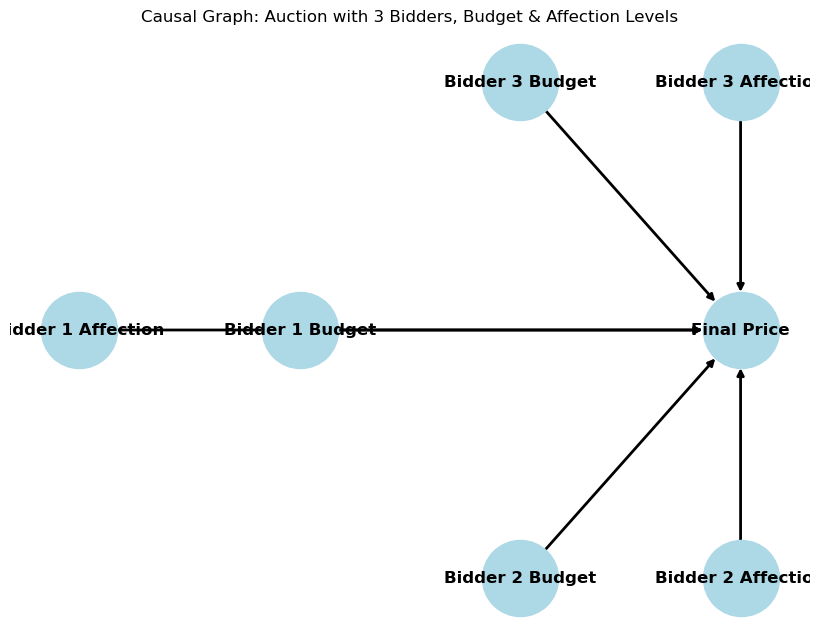

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def create_causal_graph_with_updated_conditions():
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes for bidders' budgets, affection levels, and the final price
    G.add_node("Bidder 1 Budget")
    G.add_node("Bidder 2 Budget")
    G.add_node("Bidder 3 Budget")
    G.add_node("Bidder 1 Affection")
    G.add_node("Bidder 2 Affection")
    G.add_node("Bidder 3 Affection")
    G.add_node("Final Price")

    # Add directed edges representing causal relationships
    G.add_edge("Bidder 1 Budget", "Final Price", weight=0.35)
    G.add_edge("Bidder 2 Budget", "Final Price", weight=0.29)
    G.add_edge("Bidder 3 Budget", "Final Price", weight=0.31)
    G.add_edge("Bidder 1 Affection", "Final Price", weight=0.1)  # Hypothetical effect of affection
    G.add_edge("Bidder 2 Affection", "Final Price", weight=0.1)  # Hypothetical effect of affection
    G.add_edge("Bidder 3 Affection", "Final Price", weight=0.1)  # Hypothetical effect of affection

    # Set node positions for better visualization
    pos = {
        "Bidder 1 Budget": (0, 1),
        "Bidder 2 Budget": (1, 0),
        "Bidder 3 Budget": (1, 2),
        "Bidder 1 Affection": (-1, 1),
        "Bidder 2 Affection": (2, 0),
        "Bidder 3 Affection": (2, 2),
        "Final Price": (2, 1)
    }

    # Draw the graph
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=12, font_weight="bold", edge_color="black", width=2, arrows=True)

    # Show the plot
    plt.title("Causal Graph: Auction with 3 Bidders, Budget & Affection Levels")
    plt.show()

# Call the function to create and display the causal graph
create_causal_graph_with_updated_conditions()

### Section 4 Auction Reservation Price & LLM Predictions

#### Auction simulations with reservation price

In [ ]:
reservation_prices = {
    "bidder1": [40, 100, 150, 200, 250, 300, 350],  # Reservation prices for Bidder 1
    "bidder2": [50, 100, 150, 200],  # Reservation prices for Bidder 2
    "bidder3": [150, 200, 250, 300]  # Reservation prices for Bidder 3
}

# Store the experiment data
experiment_data = []
dialogues = []

def run_auction(bidder1_reservation, bidder2_reservation, bidder3_reservation):
    """Run the auction simulation with GPT-4o based on reservation prices."""

    prompt = f"""
    You are an auctioneer hosting an auction for a piece of art.
    The auction proceeds with bidders taking turns to raise the bid, each bid must exceed the current highest bid.
    The auction continues until no bidder is willing to bid higher.

    The reservation prices for the bidders are as follows:
    - Bidder 1's reservation price: ${bidder1_reservation}
    - Bidder 2's reservation price: ${bidder2_reservation}
    - Bidder 3's reservation price: ${bidder3_reservation}

    Please conduct the auction and explicitly state the final price, for example, "Final Price: $XXX".
    """

    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": prompt}]
    )

    dialogue_text = response.choices[0].message.content
    final_price = extract_final_price(dialogue_text)

    return final_price, dialogue_text

def extract_final_price(text):
    """Extract the final price from GPT-4o generated text"""
    match = re.search(r"Final Price: \$(\d{1,3}(?:,\d{3})*)", text)  # Allow commas
    if match:
        return int(match.group(1).replace(",", ""))  # Remove commas and return as integer
    return None  # Return None if final price is not found

# Run the auction simulations (3 bidders with varying reservation prices)
for bidder1_reservation in reservation_prices["bidder1"]:
    for bidder2_reservation in reservation_prices["bidder2"]:
        for bidder3_reservation in reservation_prices["bidder3"]:
            final_price, dialogue = run_auction(bidder1_reservation, bidder2_reservation, bidder3_reservation)

            # Store the dialogue
            dialogues.append({
                "bidder1_reservation": bidder1_reservation,
                "bidder2_reservation": bidder2_reservation,
                "bidder3_reservation": bidder3_reservation,
                "final_price": final_price,
                "dialogue": dialogue
            })

            # Store experiment data for regression analysis
            experiment_data.append({
                "bidder1_reservation": bidder1_reservation,
                "bidder2_reservation": bidder2_reservation,
                "bidder3_reservation": bidder3_reservation,
                "final_price": final_price
            })

# Save auction dialogues to JSON
with open("auction_dialogues_reservation.json", "w", encoding="utf-8") as json_file:
    json.dump(dialogues, json_file, indent=4, ensure_ascii=False)

# Save experiment data to CSV for regression analysis
df = pd.DataFrame(experiment_data)
df.to_csv("auction_results_reservation.csv", index=False)

print("✅ Experiment completed! Dialogues saved as JSON, and experiment data saved as CSV.")

✅ Experiment completed! Dialogues saved as JSON, and experiment data saved as CSV.


In [ ]:
df=df.dropna()
# Run regression analysis (OLS) using statsmodels
X = df[["bidder1_reservation", "bidder2_reservation", "bidder3_reservation"]]
y = df["final_price"]

# Add a constant to the independent variables (for the intercept term)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

# Save the regression coefficients (optional)
regression_results = {
    "coefficients": model.params,
    "R-squared": model.rsquared,
    "p-values": model.pvalues
}

                            OLS Regression Results                            
Dep. Variable:            final_price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     52.77
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           7.02e-21
Time:                        20:50:44   Log-Likelihood:                -562.32
No. Observations:                 109   AIC:                             1133.
Df Residuals:                     105   BIC:                             1143.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.7191    

#### Predict y task: directly predict final price using LLM

In [ ]:
# Define reservation prices for bidders
reservation_prices = {
    "bidder1": [40, 100, 150, 200, 250, 300, 350],  # Reservation prices for Bidder 1
    "bidder2": [50, 100, 150, 200],  # Reservation prices for Bidder 2
    "bidder3": [150, 200, 250, 300]  # Reservation prices for Bidder 3
}

# Store the experiment data
experiment_data = []
predictions = []

def extract_final_price(text):
    """Extract the final price from GPT-4o generated text"""
    match = re.search(r"Predicted Final Clearing Price: \$(\d{1,3}(?:,\d{3})*)", text)  # Allow commas
    if match:
        return int(match.group(1).replace(",", ""))  # Remove commas and return as integer
    return None  # Return None if final price is not found

def predict_final_price(bidder1_reservation, bidder2_reservation, bidder3_reservation):
    """Function to get LLM prediction for final price and coefficients"""

    # Formulate the prompt for LLM
    prompt = f"""
    You are conducting an auction where the final clearing price is determined by the reservation prices of three bidders.

    The reservation prices for the bidders are as follows:
    - Bidder 1's reservation price: ${bidder1_reservation}
    - Bidder 2's reservation price: ${bidder2_reservation}
    - Bidder 3's reservation price: ${bidder3_reservation}

    Please predictthe final clearing price for this auction.
    Format your answer in the following structure, you don't have to answer other words:
    Predicted Final Clearing Price: [price]
    """

    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": prompt}]
    )

    dialogue_text = response.choices[0].message.content
    final_price = extract_final_price(dialogue_text)

    return final_price, dialogue_text

    # Display the coefficients and significance levels in Jupyter Notebook (just once)
    print(dialogue_text)  # This will output the coefficients and significance levels in the notebook

    return final_price

# Run the auction predictions for each combination of reservation prices
for bidder1_reservation in reservation_prices["bidder1"]:
    for bidder2_reservation in reservation_prices["bidder2"]:
        for bidder3_reservation in reservation_prices["bidder3"]:
            final_price = predict_final_price(bidder1_reservation, bidder2_reservation, bidder3_reservation)

            # Store the predictions (final price only)
            predictions.append({
                "bidder1_reservation": bidder1_reservation,
                "bidder2_reservation": bidder2_reservation,
                "bidder3_reservation": bidder3_reservation,
                "final_price": final_price
            })

            # Also store experiment data for future analysis if needed
            experiment_data.append({
                "bidder1_reservation": bidder1_reservation,
                "bidder2_reservation": bidder2_reservation,
                "bidder3_reservation": bidder3_reservation,
                "final_price": final_price
            })

# Save the LLM predictions to JSON for further analysis
with open("llm_predictions.json", "w", encoding="utf-8") as json_file:
    json.dump(predictions, json_file, indent=4)

# Save experiment data to CSV for easy analysis (only final price data)
df = pd.DataFrame(experiment_data)
df.to_csv("auction_predictions_final_price.csv", index=False)

print("✅ Predictions completed! Predictions saved as JSON and CSV.")

✅ Predictions completed! Predictions saved as JSON and CSV.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bidder1_reservation  112 non-null    int64 
 1   bidder2_reservation  112 non-null    int64 
 2   bidder3_reservation  112 non-null    int64 
 3   final_price          112 non-null    object
dtypes: int64(3), object(1)
memory usage: 3.6+ KB


In [ ]:
df.to_csv("auction_predictions_final_price.csv", index=False)

In [ ]:
df.head()

,bidder1_reservation,bidder2_reservation,bidder3_reservation,final_price
0,40,50,150,"(50, Predicted Final Clearing Price: $50)"
1,40,50,200,"(50, Predicted Final Clearing Price: $50)"
2,40,50,250,"(40, Predicted Final Clearing Price: $40)"
3,40,50,300,"(50, Predicted Final Clearing Price: $50)"
4,40,100,150,"(100, Predicted Final Clearing Price: $100)"


In [ ]:
print(df["final_price"].iloc[:5])

0      (50, Predicted Final Clearing Price: $50)
1      (50, Predicted Final Clearing Price: $50)
2      (40, Predicted Final Clearing Price: $40)
3      (50, Predicted Final Clearing Price: $50)
4    (100, Predicted Final Clearing Price: $100)
Name: final_price, dtype: object


In [ ]:
# Function to extract the first element from tuples
def clean_final_price(value):
    """Extract the final price if stored as a tuple."""
    if isinstance(value, tuple) or isinstance(value, list):
        return value[0]  # Extracts the first element (e.g., 50)
    return None  # Return None if value is not a tuple/list

# Apply the function to clean the final_price column
df["final_price"] = df["final_price"].apply(clean_final_price)

# Display cleaned dataframe
print(df.head())

# Save the cleaned data to CSV
df.to_csv("cleaned_auction_predictions.csv", index=False)

   bidder1_reservation  bidder2_reservation  bidder3_reservation  final_price
0                   40                   50                  150           50
1                   40                   50                  200           50
2                   40                   50                  250           40
3                   40                   50                  300           50
4                   40                  100                  150          100


In [ ]:
import statsmodels.api as sm
import pandas as pd

# Load the prediction data (from previous steps)
# Assuming the 'experiment_data' contains columns for "bidder1_reservation", "bidder2_reservation", "bidder3_reservation", and "final_price"
df4 = pd.read_csv("C:\\Users\\11541\\cleaned_auction_predictions.csv")
df4=df4.dropna()

# Check if the data is loaded correctly
print(df4.head())

# Prepare the independent variables (X) - reservation prices of the bidders
X = df4[["bidder1_reservation", "bidder2_reservation", "bidder3_reservation"]]

# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

# Dependent variable (y) - the final clearing price
y = df4["final_price"]

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

   bidder1_reservation  bidder2_reservation  bidder3_reservation  final_price
0                   40                   50                  150           50
1                   40                   50                  200           50
2                   40                   50                  250           40
3                   40                   50                  300           50
4                   40                  100                  150          100
                            OLS Regression Results                            
Dep. Variable:            final_price   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     13.90
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           9.90e-08
Time:                        22:17:36   Log-Likelihood:                -617.35
No. Observations:                 112   AIC:              

#### Predict β task: directly predict regression coefficients using LLM

In [ ]:
# Define the prompt for predicting the overall regression model (for all reservation prices)
def get_regression_model():
    prompt = """
    Based on the following reservation prices for three bidders, predict the regression equation of the form y = kX,
    where y is the final clearing price, and X is the reservation price for each bidder.

    The reservation prices for the bidders are as follows:
    - Bidder 1's reservation prices: [40, 100, 150, 200, 250, 300, 350]
    - Bidder 2's reservation prices: [50, 100, 150, 200]
    - Bidder 3's reservation prices: [150, 200, 250, 300]

    Provide the following information:
    1. The regression equation in the form of y = kX for each bidder's reservation price.
    2. The coefficients for Bidder 1, Bidder 2, and Bidder 3.
    3. The significance levels for each coefficient.
    4. The R-squared value for the model.
    """

    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": prompt}]
    )

    regression_result = response.choices[0].message.content

    return regression_result

# Request regression model from LLM
regression_results = get_regression_model()

# Display the regression results
print(regression_results)

To determine the regression equation \( y = kX \) for each bidder's reservation price, we need to perform a linear regression analysis for each set of data. Given the reservation prices for each bidder, we can create a basic linear regression model without additional data on the final clearing prices. For simplicity, let's assume that the clearing price \( y \) is directly proportional to each bidder's reservation price \( X \).

### 1. Regression Equation

Let’s denote each bidder’s reservation price as \( X \) and the final clearing price as \( y \). The form of the regression equation will be:

\[ y = kX \]

Here, \( k \) is the coefficient we need to determine for each bidder.

### 2. Fitting the Model

Without specific final clearing prices, we’ll assume hypothetical clearing prices that could be proportional to the reservation prices.

#### Bidder 1:
Reservation Prices: [40, 100, 150, 200, 250, 300, 350]

Let’s assume:
Hypothetical Final Clearing Prices (y): \( 0.8 \times X \)

U

#### Predict y|β task: predict final price given SCM estimation except ith observation

In [ ]:
import openai
import json
import pandas as pd
import numpy as np
import statsmodels.api as sm
import re

# Load the experimental results dataset (to fit SCM models)
df_experiment = pd.read_csv("cleaned_auction_predictions.csv")  # Ensure this file contains all experiments

# Define reservation prices for bidders
reservation_prices = {
    "bidder1": [40, 100, 150, 200, 250, 300, 350],
    "bidder2": [50, 100, 150, 200],
    "bidder3": [150, 200, 250, 300]
}

# Store new predictions
new_predictions = []

def fit_scm_excluding_i(excluded_index):
    """Fit regression model excluding one observation."""
    df_temp = df_experiment.drop(index=excluded_index)  # Drop one observation
    X = df_temp[["bidder1_reservation", "bidder2_reservation", "bidder3_reservation"]]
    y = df_temp["final_price"]

    X = sm.add_constant(X)  # Add intercept
    model = sm.OLS(y, X).fit()

    return model.params  # Return new coefficients

def predict_final_price_with_scm(bidder1_reservation, bidder2_reservation, bidder3_reservation, excluded_index):
    """Ask LLM to predict final clearing price using the regression fitted on X−i."""

    # Fit new regression excluding this Xi
    beta_params = fit_scm_excluding_i(excluded_index)

    # Compute the regression-based prediction
    formula_prediction = (beta_params["const"] +
                          beta_params["bidder1_reservation"] * bidder1_reservation +
                          beta_params["bidder2_reservation"] * bidder2_reservation +
                          beta_params["bidder3_reservation"] * bidder3_reservation)

    # Formulate the LLM prompt
    prompt = f"""
    We have performed an auction experiment and fitted a regression model to predict the final clearing price based on bidders' reservation prices.

    The regression model (excluding this observation) is:
    Final Price = {beta_params["const"]:.4f} + ({beta_params["bidder1_reservation"]:.4f} * Bidder1_Reservation) +
                  ({beta_params["bidder2_reservation"]:.4f} * Bidder2_Reservation) + ({beta_params["bidder3_reservation"]:.4f} * Bidder3_Reservation)

    Given this model, please predict the final clearing price for the following reservation prices:
    - Bidder 1's reservation price: ${bidder1_reservation}
    - Bidder 2's reservation price: ${bidder2_reservation}
    - Bidder 3's reservation price: ${bidder3_reservation}

    Provide your answer in this format:
    Predicted Final Clearing Price: [price]
    """

    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": prompt}]
    )

    dialogue_text = response.choices[0].message.content

    # Extract the predicted price from LLM response
    match = re.search(r"Predicted Final Clearing Price: \$(\d{1,3}(?:,\d{3})*)", dialogue_text)
    llm_price = int(match.group(1).replace(",", "")) if match else None

    return formula_prediction, llm_price, dialogue_text

# Iterate through each reservation price combination
for idx, row in df_experiment.iterrows():
    bidder1_reservation = row["bidder1_reservation"]
    bidder2_reservation = row["bidder2_reservation"]
    bidder3_reservation = row["bidder3_reservation"]

    formula_pred, llm_pred, dialogue_text = predict_final_price_with_scm(
        bidder1_reservation, bidder2_reservation, bidder3_reservation, excluded_index=idx)

    # Store predictions
    new_predictions.append({
        "bidder1_reservation": bidder1_reservation,
        "bidder2_reservation": bidder2_reservation,
        "bidder3_reservation": bidder3_reservation,
        "formula_prediction": round(formula_pred, 2),  # Model-based prediction
        "llm_prediction": llm_pred  # LLM-based prediction
    })

# Save results to CSV
df_new = pd.DataFrame(new_predictions)
df_new.to_csv("auction_predictions_excluding_i.csv", index=False)

print("✅ Predictions with SCM (excluding i) completed! Saved to auction_predictions_excluding_i.csv.")

✅ Predictions with SCM (excluding i) completed! Saved to auction_predictions_excluding_i.csv.


In [ ]:
df_new.head()

,bidder1_reservation,bidder2_reservation,bidder3_reservation,formula_prediction,llm_prediction
0,40,50,150,66.28,NaN
1,40,50,200,80.94,80.0
2,40,50,250,96.34,NaN
3,40,50,300,111.66,NaN
4,40,100,150,86.06,86.0


In [ ]:
df_new.drop("llm_prediction",axis=1,inplace=True)

In [ ]:
df_new.head()

,bidder1_reservation,bidder2_reservation,bidder3_reservation,formula_prediction
0,40,50,150,66.28
1,40,50,200,80.94
2,40,50,250,96.34
3,40,50,300,111.66
4,40,100,150,86.06


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bidder1_reservation  112 non-null    int64  
 1   bidder2_reservation  112 non-null    int64  
 2   bidder3_reservation  112 non-null    int64  
 3   formula_prediction   112 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 3.6 KB


#### Results graph and analysis


Subset for Bidder2=50, Bidder3=150
    bidder1_reservation  Auc_Theory  final_price  formula_prediction
0                    40          50           50               66.28
16                  100         100           50               80.67
32                  150         150          150               88.07
48                  200         150           50              104.55
64                  250         150          150              112.25

Subset for Bidder2=50, Bidder3=200
    bidder1_reservation  Auc_Theory  final_price  formula_prediction
1                    40          50           50               80.94
17                  100         100          100               93.09
33                  150         150          150              103.58
49                  200         200          200              114.19
65                  250         200           50              130.40

Subset for Bidder2=50, Bidder3=250
    bidder1_reservation  Auc_Theory  final_price  formula_predic

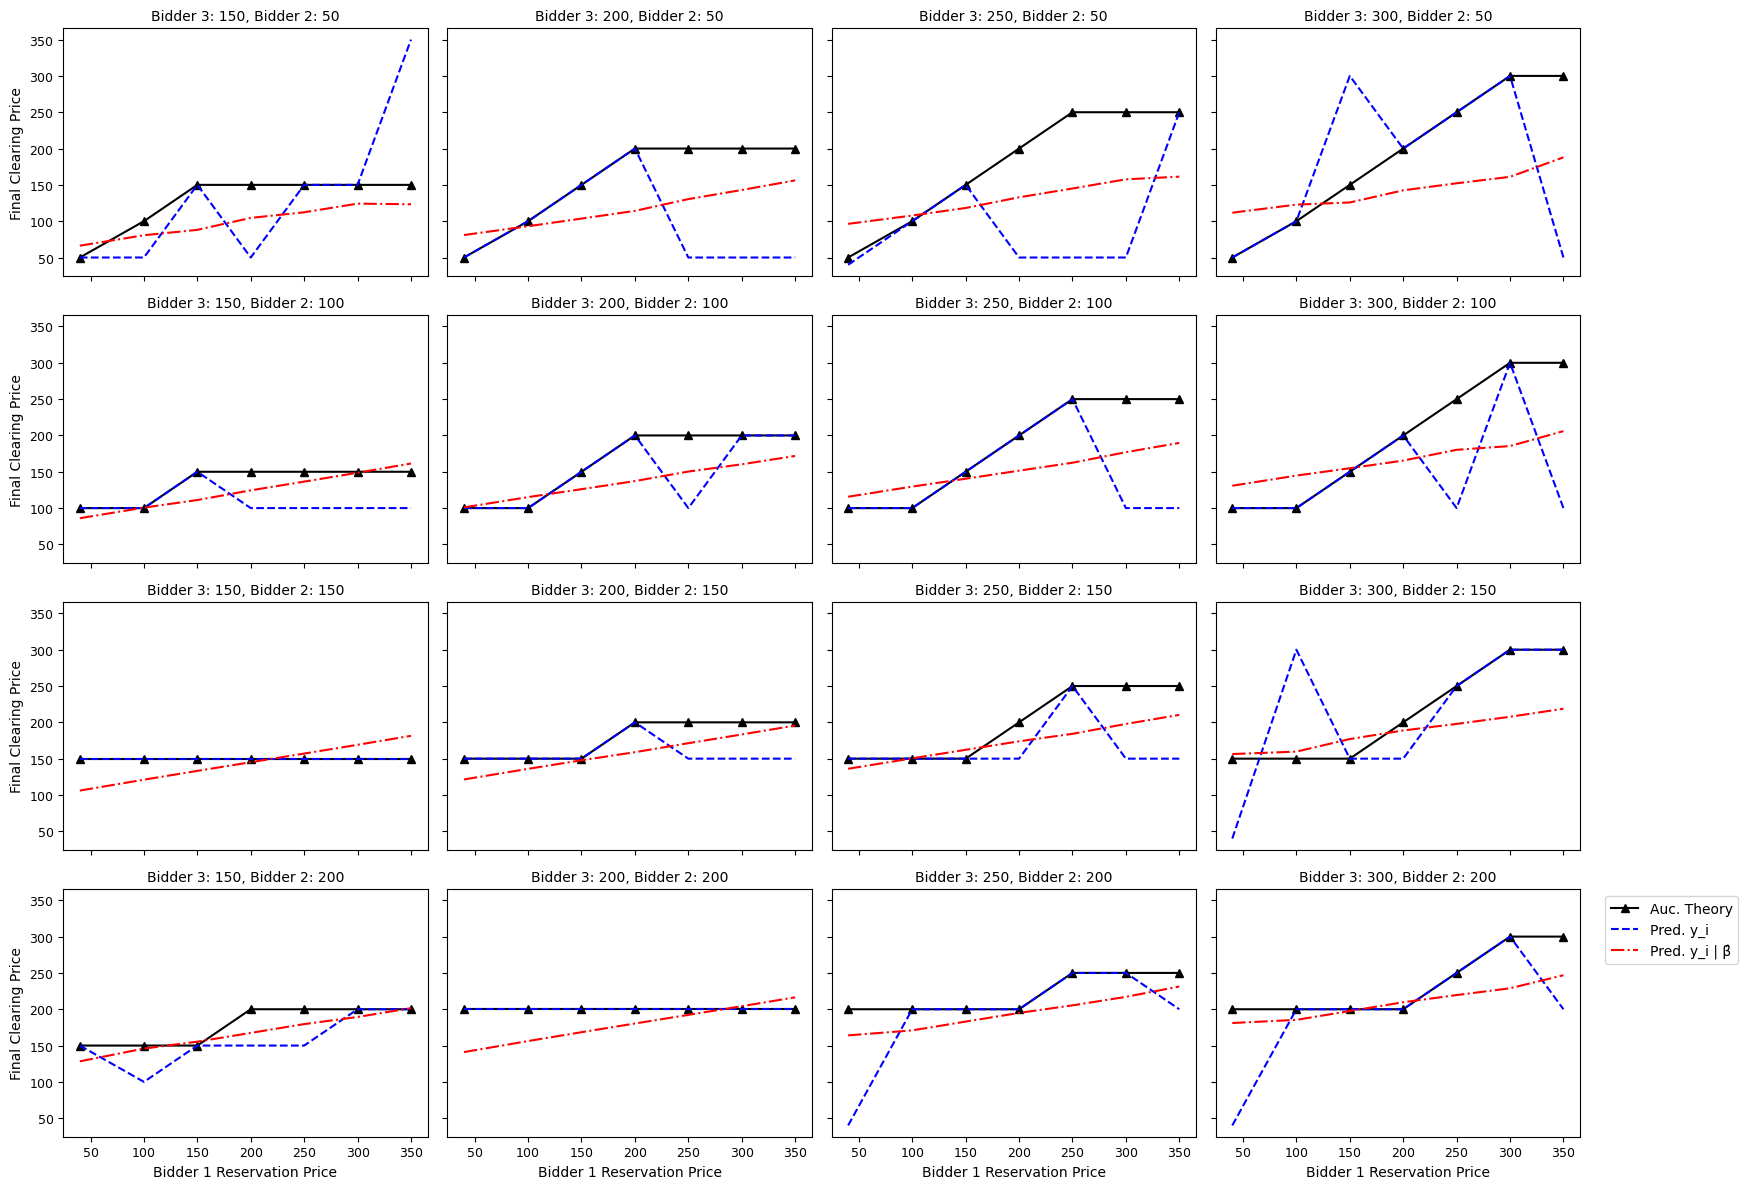

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the results CSV files
df_blue = pd.read_csv("cleaned_auction_predictions.csv")  # LLM Direct Prediction
df_red = pd.read_csv("auction_predictions_excluding_i.csv")  # LLM with SCM Prediction

# Ensure numeric data for final price columns
df_blue["final_price"] = pd.to_numeric(df_blue["final_price"], errors="coerce")
df_red["formula_prediction"] = pd.to_numeric(df_red["formula_prediction"], errors="coerce")

# Compute Auction Theory Prices (Second-Highest Bid)
df_blue["Auc_Theory"] = df_blue.apply(lambda row: sorted([
    row["bidder1_reservation"], row["bidder2_reservation"], row["bidder3_reservation"]
])[1], axis=1)

# Merge datasets
df_results = df_blue.merge(df_red, on=["bidder1_reservation", "bidder2_reservation", "bidder3_reservation"], suffixes=("_blue", "_red"))

# Extract unique values for looping
bidder2_reservation_prices = sorted(df_results["bidder2_reservation"].unique())
bidder3_reservation_prices = sorted(df_results["bidder3_reservation"].unique())

# Create subplots
fig, axes = plt.subplots(nrows=len(bidder2_reservation_prices), ncols=len(bidder3_reservation_prices), figsize=(16, 12), sharex=True, sharey=True)

# Loop through each subplot and plot the results
for i, bidder2 in enumerate(bidder2_reservation_prices):
    for j, bidder3 in enumerate(bidder3_reservation_prices):
        ax = axes[i, j]  # Select current subplot

        # Filter data for current Bidder 2 and Bidder 3 reservation prices
        subset = df_results[(df_results["bidder2_reservation"] == bidder2) & (df_results["bidder3_reservation"] == bidder3)]

        # Debugging: Check if values are correct
        print(f"\nSubset for Bidder2={bidder2}, Bidder3={bidder3}")
        print(subset[["bidder1_reservation", "Auc_Theory", "final_price", "formula_prediction"]].head())

        # Plot Auction Theory (black line)
        ax.plot(subset["bidder1_reservation"], subset["Auc_Theory"], "k-", marker="^", label="Auc. Theory")

        # Plot LLM without SCM (blue line)
        ax.plot(subset["bidder1_reservation"], subset["final_price"], "b--", label="Pred. y_i")

        # Plot LLM with SCM (red line)
        ax.plot(subset["bidder1_reservation"], subset["formula_prediction"], "r-.", label="Pred. y_i | β̂")

        # Title and labels
        ax.set_title(f"Bidder 3: {bidder3}, Bidder 2: {bidder2}", fontsize=10)

        # Only label the leftmost and bottom plots
        if j == 0:
            ax.set_ylabel("Final Clearing Price", fontsize=10)
        if i == len(bidder2_reservation_prices) - 1:
            ax.set_xlabel("Bidder 1 Reservation Price", fontsize=10)

        # Reduce tick label size
        ax.tick_params(axis='both', which='major', labelsize=9)

# Adjust layout for better readability
plt.tight_layout()
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), fontsize=10)  # Move legend outside
plt.show()

![image.png](attachment:image.png)

In [ ]:
import pandas as pd
import numpy as np

# Load the experimental results (LLM-generated auction data)
df_experiment = pd.read_csv("auction_results_reservation.csv")  # Replace with actual experiment data file

# Load predictions
df_blue = pd.read_csv("cleaned_auction_predictions.csv")  # LLM Direct Prediction
df_red = pd.read_csv("auction_predictions_excluding_i.csv")  # LLM with SCM Prediction

# ✅ 1. Recalculate Auction Theory Prices (Ensure Correct Calculation)
df_experiment["Auc_Theory"] = df_experiment.apply(lambda row: sorted([
    row["bidder1_reservation"], row["bidder2_reservation"], row["bidder3_reservation"]
])[1], axis=1)  # Second-highest bid is the clearing price

# ✅ 2. Merge Datasets
df_results = df_experiment.merge(df_blue, on=["bidder1_reservation", "bidder2_reservation", "bidder3_reservation"], suffixes=("_exp", "_blue"))
df_results = df_results.merge(df_red, on=["bidder1_reservation", "bidder2_reservation", "bidder3_reservation"], suffixes=("", "_red"))
mean_price = df_results["final_price_exp"].mean()
std_price = df_results["final_price_exp"].std()
df_results = df_results[(np.abs((df_results["final_price_exp"] - mean_price) / std_price) < 3)]  # 过滤 Z-score > 3
# ✅ 3. Ensure Numeric Data

df_results["final_price_exp"] = pd.to_numeric(df_results["final_price_exp"], errors="coerce")  # Experimental results
df_results["Auc_Theory"] = pd.to_numeric(df_results["Auc_Theory"], errors="coerce")  # Auction theory
df_results["final_price_blue"] = pd.to_numeric(df_results["final_price_blue"], errors="coerce")  # LLM Direct Prediction
df_results["formula_prediction"] = pd.to_numeric(df_results["formula_prediction"], errors="coerce")  # LLM with SCM

# ✅ 4. Debugging: Print Samples to Check for Errors
print("\n🔍 Sample Data:")
print(df_results[["bidder1_reservation", "bidder2_reservation", "bidder3_reservation", "Auc_Theory", "final_price_exp","formula_prediction"]].head())


# ✅ 5. Compute MSEs
MSE_theory = np.mean((df_results["final_price_exp"] - df_results["Auc_Theory"]) ** 2)
MSE_yi = np.mean((df_results["final_price_exp"] - df_results["final_price_blue"]) ** 2)
MSE_yi_beta = np.mean((df_results["final_price_exp"] - df_results["formula_prediction"]) ** 2)

# Print results
print(f"✅ MSE (Auction Theory vs. Experiment): {MSE_theory:.2f}")
print(f"✅ MSE (LLM Direct Prediction vs. Experiment): {MSE_yi:.2f}")
print(f"✅ MSE (LLM SCM Prediction vs. Experiment): {MSE_yi_beta:.2f}")

# Save MSEs to a file for reference
with open("mse_results.txt", "w") as f:
    f.write(f"MSE (Auction Theory vs. Experiment): {MSE_theory:.2f}\n")
    f.write(f"MSE (LLM Direct Prediction vs. Experiment): {MSE_yi:.2f}\n")
    f.write(f"MSE (LLM SCM Prediction vs. Experiment): {MSE_yi_beta:.2f}\n")


🔍 Sample Data:
   bidder1_reservation  bidder2_reservation  bidder3_reservation  Auc_Theory  \
0                   40                   50                  150        50.0   
1                   40                   50                  200        50.0   
2                   40                   50                  250        50.0   
3                   40                   50                  300        50.0   
4                   40                  100                  150       100.0   

   final_price_exp  formula_prediction  
0             60.0               66.28  
1             50.0               80.94  
2             50.0               96.34  
3             60.0              111.66  
4            160.0               86.06  
✅ MSE (Auction Theory vs. Experiment): 1640.61
✅ MSE (LLM Direct Prediction vs. Experiment): 7830.70
✅ MSE (LLM SCM Prediction vs. Experiment): 4731.20
